In [1]:
import pandas
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pandas.read_csv('../data/training_input.csv', usecols=['offset', 'bid_1', 'bid_size_1', 'ask_1', 'ask_size_1', 'nb_trade', 'bid_size_2', 'ask_size_2'])

In [3]:
nb_trade_diff = train['nb_trade'].diff().values
bid_1_diff = train['bid_1'].diff().values

In [4]:
n_epochs = int(nb_trade_diff.shape[0]/8)

In [5]:
bid_1_diff[0]=0

In [6]:
interesting_epochs=[]
for i in range(n_epochs):
    if nb_trade_diff[i*8+1]>0 and nb_trade_diff[i*8+2 : i*8 + 7].sum()==0 and bid_1_diff[i*8 : i*8+7].sum()==0:
        interesting_epochs.append(i)

In [7]:
bid_size_1=train['bid_size_1'].values
ask_size_1=train['ask_size_1'].values
nb_trade = train['nb_trade'].values

In [8]:
mat_1 = bid_size_1.reshape((-1,8))
mat_2 = mat_1[interesting_epochs, :]
mat_3 = (mat_2.T - mat_2[:, 0]).T
mat_4 = np.abs(mat_3)

Impact d'un groupe de trades sur la variation de la taille du bid
------------------------------------------------------

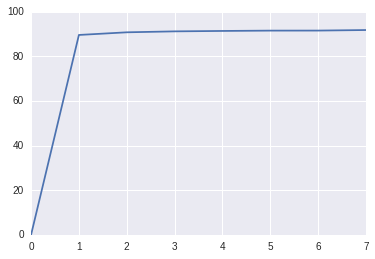

In [9]:
ERP = mat_4.mean(axis=0)
plt.plot(ERP)

Variation moyenne de la taille du bid rapportée au nombre de trades
----------

In [10]:
(np.abs((mat_2[:, 1]-mat_2[:, 0]))/nb_trade[np.array(interesting_epochs)*8+1]).mean()

24.302117479936964

In [11]:
(np.abs((mat_2[:, 1]-mat_2[:, 0]))/nb_trade[np.array(interesting_epochs)*8+1]).std()

64.498119758237877

In [12]:
(np.abs((mat_2[:, 1]-mat_2[:, 0]))).std()

178.43596230791636

Nombre moyen de trades dans une demi-seconde
--------------------------------------------

In [13]:
nb_trade[np.array(interesting_epochs)*8+1].mean()

7.0592268512472245

In [14]:
mat_1 = bid_size_1.reshape((-1,8))
mat_2 = mat_1[interesting_epochs, :]
mat_3 = (mat_2.T - mat_2[:, 0]).T
mat_3

array([[   0,   97,   56, ...,   56,   56,   56],
       [   0,  -76,  -76, ..., -112, -112, -112],
       [   0,  126,  126, ...,  137,  137,  137],
       ..., 
       [   0,  -53,  -39, ...,  -39,  -39,  -39],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [15]:
mat_4 = ask_size_1.reshape((-1,8))
mat_5 = mat_4[interesting_epochs, :]
mat_6 = (mat_5.T - mat_5[:, 0]).T
mat_6

array([[   0, -127, -110, ..., -130, -130, -130],
       [   0, -347, -347, ..., -301, -301, -301],
       [   0,  -95, -107, ..., -100, -100, -100],
       ..., 
       [   0,   10,   10, ...,   10,   10,   10],
       [   0,  -10,  -10, ...,  -10,  -10,  -10],
       [   0,   -1,   -1, ...,   -1,   -1,   -1]], dtype=int64)

In [17]:
D, V = np.linalg.eigh(np.cov(mat_3[:, 1], mat_6[:, 1]))

Variation de la taille du bid et du ask après un trade
-----------------------------

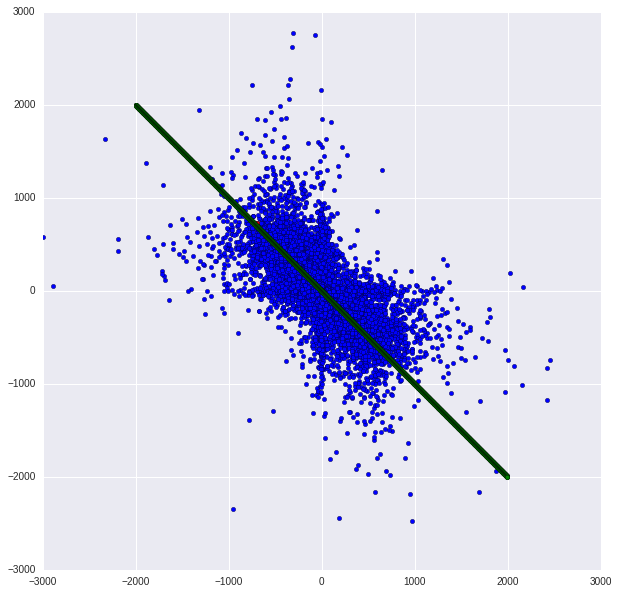

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(mat_3[:, 1], mat_6[:, 1])
plt.scatter(1000*V[0, -1], 1000*V[1,-1], c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-3000, 3000)
plt.ylim(-3000, 3000)
plt.scatter(np.arange(-2000, 2000), -np.arange(-2000, 2000), c='g')

Variable change (bid_size_1, ask_size_1) by (bid_size_1+ask_size_1, bid_size_1/(bid_size_1+ask_size_1))

In [21]:
interesting_epochs=[]
for i in range(n_epochs):
    if nb_trade_diff[i*8+1]>0 and nb_trade_diff[i*8+2 : i*8 + 7].sum()==0 and bid_1_diff[i*8+1]>0 and bid_1_diff[i*8+2:i*8+7].sum()==0:
        interesting_epochs.append(i)

In [23]:
bid_size_1=train['bid_size_1'].values
ask_size_1=train['ask_size_1'].values
bid_size_2=train['bid_size_2'].values
ask_size_2=train['ask_size_2'].values

In [29]:
mat_1 = bid_size_1.reshape((-1,8))
mat_2 = mat_1[interesting_epochs, :]
mat_3 = bid_size_2.reshape((-1,8))
mat_4 = mat_3[interesting_epochs, :]
(mat_4[:, 1]-mat_2[:, 0]+mat_2[:, 1]).mean()

221.05044810638913

Variation moyenne de la taille du bid avec changement de niveau rapportée au nombre de trades
----------------

In [26]:
((mat_4[:, 1]-mat_2[:, 0]+mat_2[:, 1])/nb_trade[np.array(interesting_epochs)*8+1]).mean()

23.616059026387742

Nombre moyen de trades sur une demi-seconde avec changement de niveau
---------------------
Attention : peut-être pas comparable avec la valeur précédente

In [30]:
nb_trade[np.array(interesting_epochs)*8+1].mean()

19.30341139057531